In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df = pd.read_csv('dataset_mood_smartphone.csv')


In [87]:
df.head()

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.0
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.0
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.0
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.0
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.0


In [88]:
df.dtypes

Unnamed: 0      int64
id             object
time           object
variable       object
value         float64
dtype: object

The datatypes

In [89]:
df.isna().sum()

Unnamed: 0      0
id              0
time            0
variable        0
value         202
dtype: int64

- 202 missing values in the column "values"

In [90]:
# transorming the dtype of "time"
df["time"] = pd.to_datetime(df["time"])

In [91]:
# transformatiing the variable name

# removed appcat string from variable name
# AS14.01 -> 01
df.loc[df['variable'].str.startswith('appCat.'), 'variable'] = df.loc[df['variable'].str.startswith('appCat.'), 'variable'].str.replace('appCat.', '')
df.loc[df['variable'].str.startswith('circumplex.'), 'variable'] = df.loc[df['variable'].str.startswith('circumplex.'), 'variable'].str.replace('circumplex.', '')
df.loc[df['id'].str.startswith('AS14.'), 'id'] = df.loc[df['id'].str.startswith('AS14.'), 'id'].str.replace('AS14.', '')

In [92]:
df.describe(include="all")



,Unnamed: 0,id,time,variable,value
count,3.769120e+05,376912,376912,376912,376710.000000
unique,NaN,27,336907,19,NaN
top,NaN,01,2014-04-14 12:00:00,screen,NaN
freq,NaN,21999,91,96578,NaN
first,NaN,NaN,2014-02-17 07:00:52.197000,NaN,NaN
last,NaN,NaN,2014-06-09 00:00:00,NaN,NaN
mean,4.501273e+05,NaN,NaN,NaN,40.665313
std,5.411519e+05,NaN,NaN,NaN,273.726007
min,1.000000e+00,NaN,NaN,NaN,-82798.871000
25%,9.422875e+04,NaN,NaN,NaN,2.025000


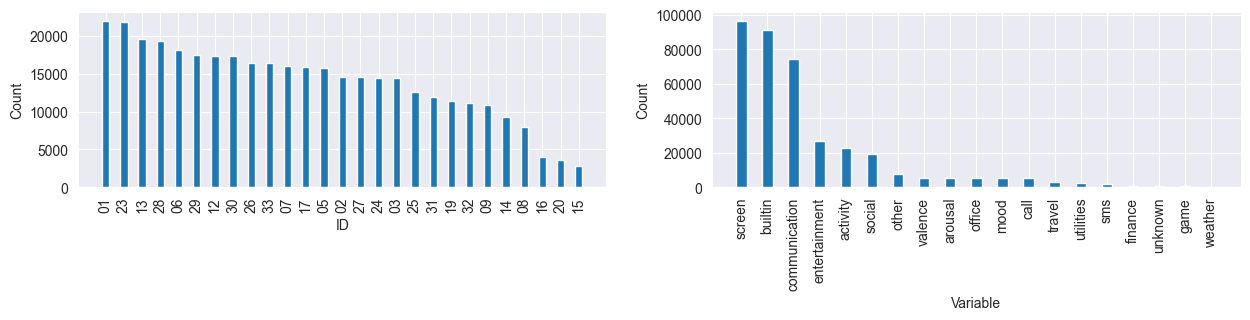

In [93]:
fig,ax = plt.subplots(1,2,figsize=[15,5])


x = df['id'].value_counts()
cols = [i for i in x.axes[0]]
vals = [i for i in x]
plt.subplot(2,2,1)
plt.bar(cols, vals, width = 0.4) 
plt.xlabel("ID")
plt.ylabel("Count")
plt.xticks(rotation=90)

x = df['variable'].value_counts()
cols = [i for i in x.axes[0]]
vals = [i for i in x]
plt.subplot(2,2,2)
plt.bar(cols, vals, width = 0.4)
plt.xlabel("Variable")
plt.ylabel("Count")
plt.xticks(rotation=90)

plt.show()


- It can be seen that the amount of data collected for various id's is different.
- Similarly, the observed data per variable is non homgenously distributed

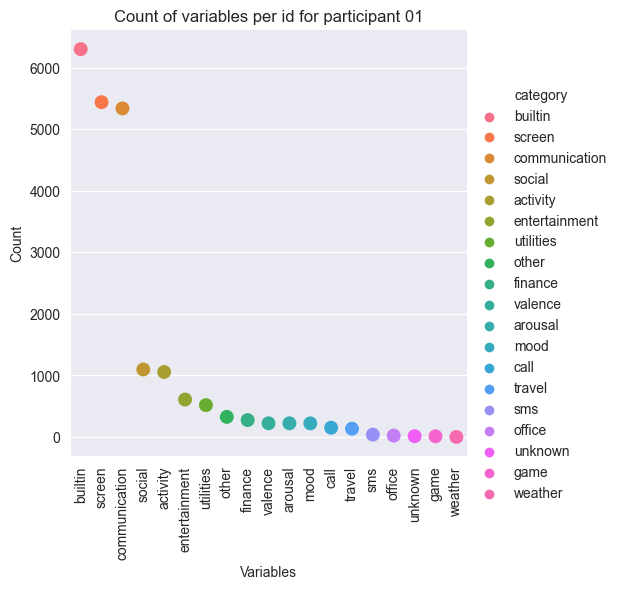

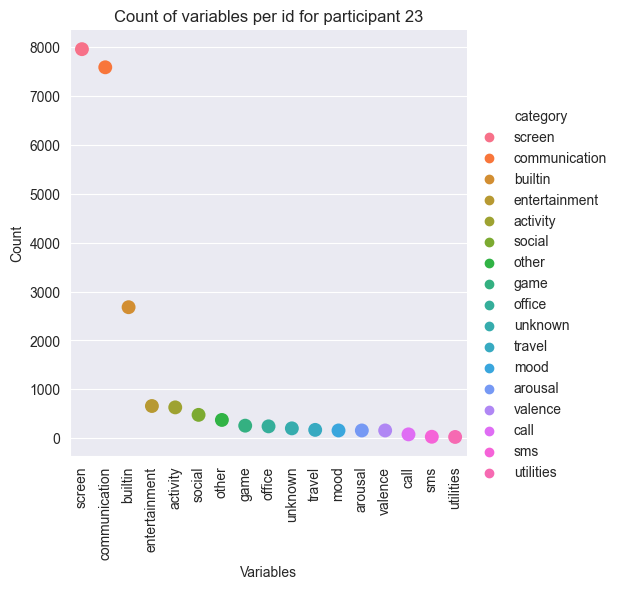

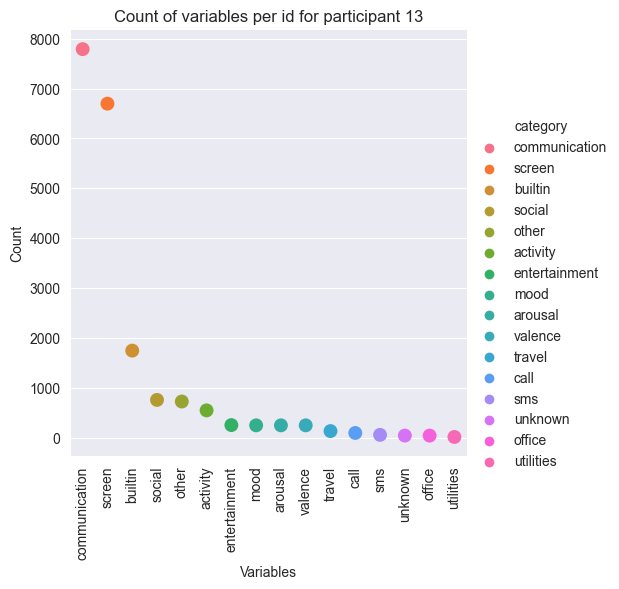

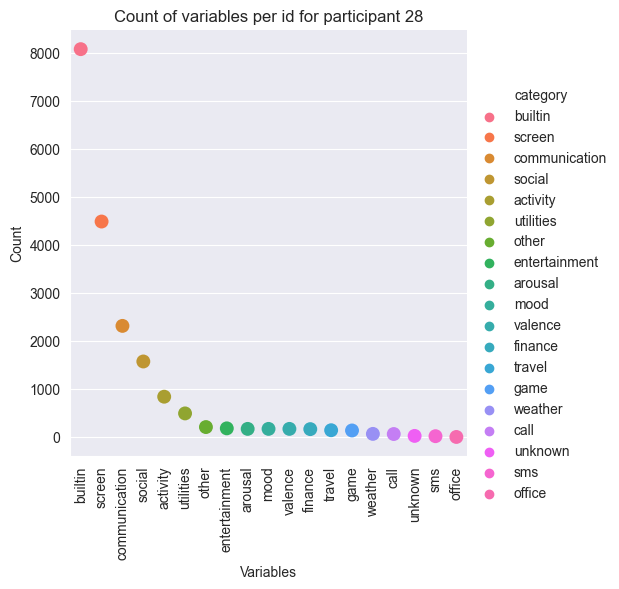

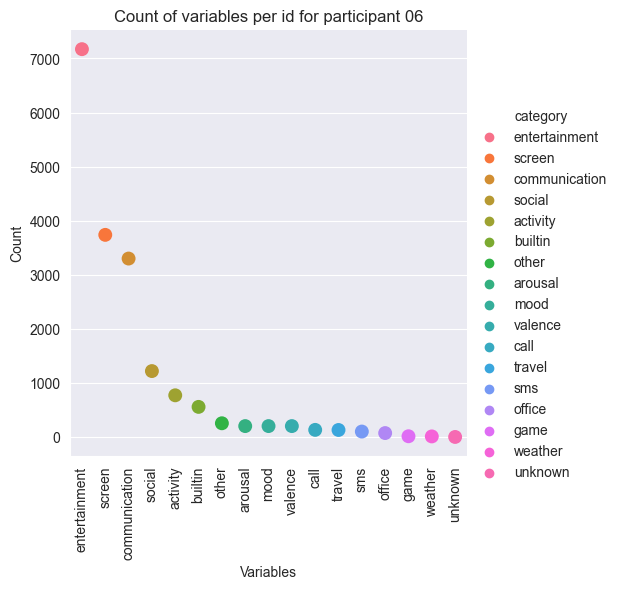

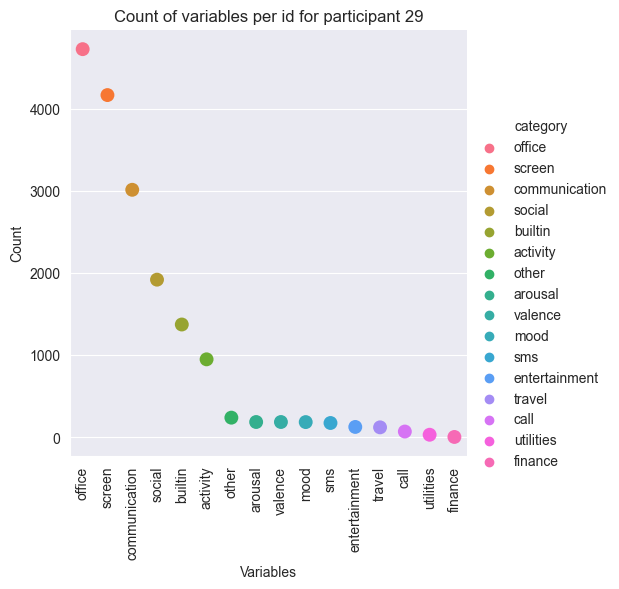

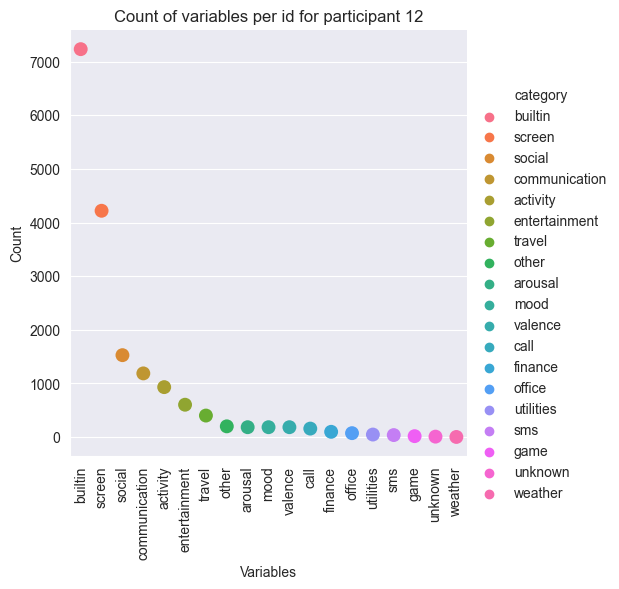

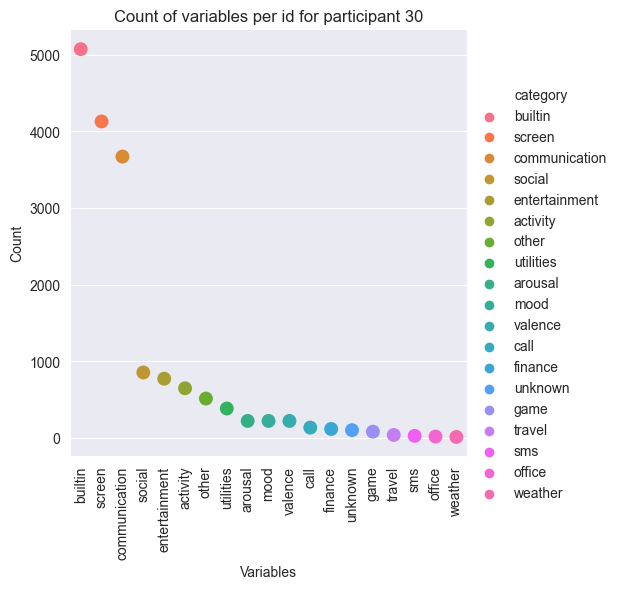

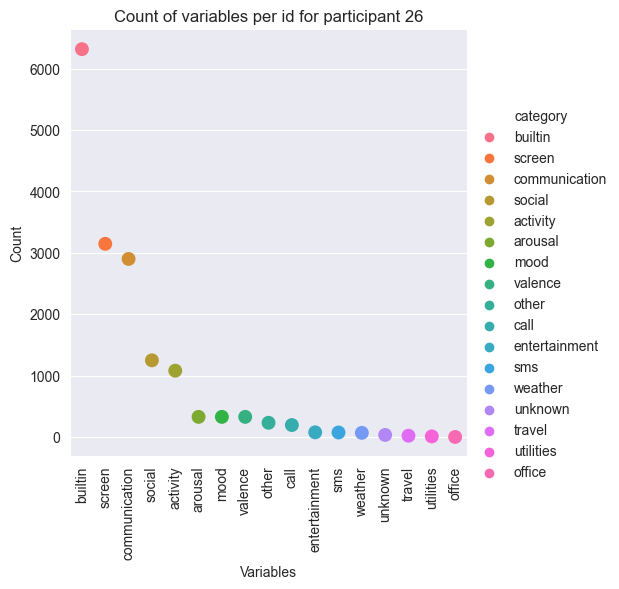

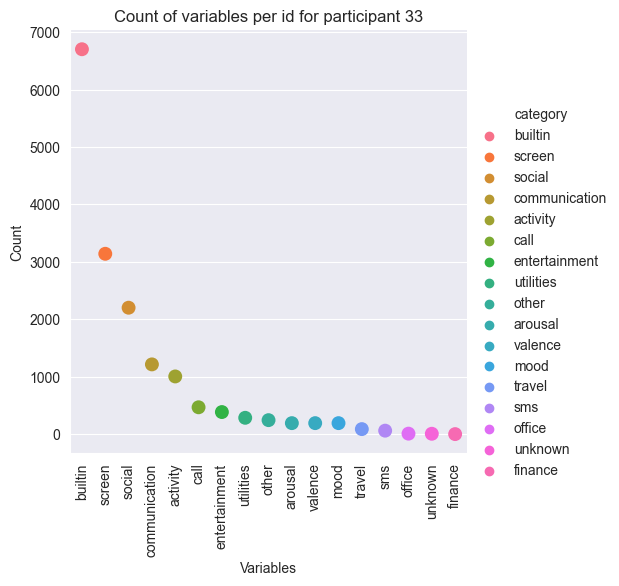

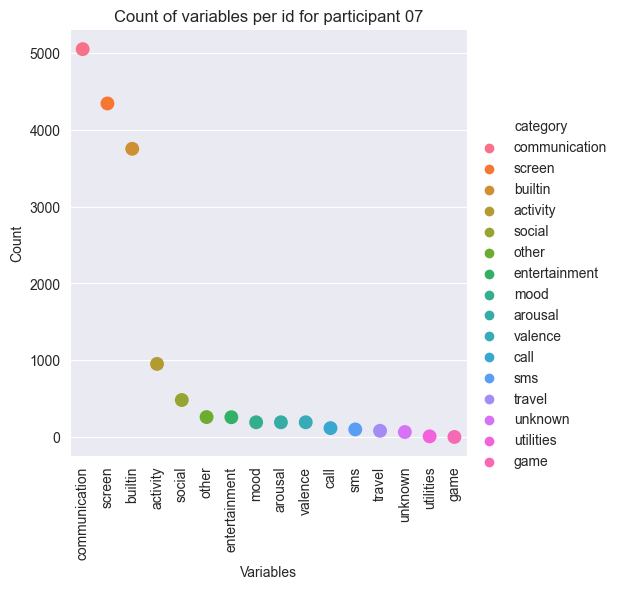

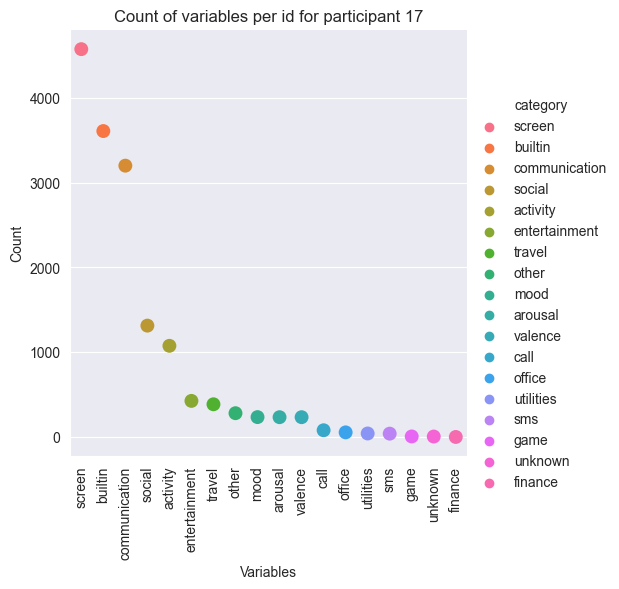

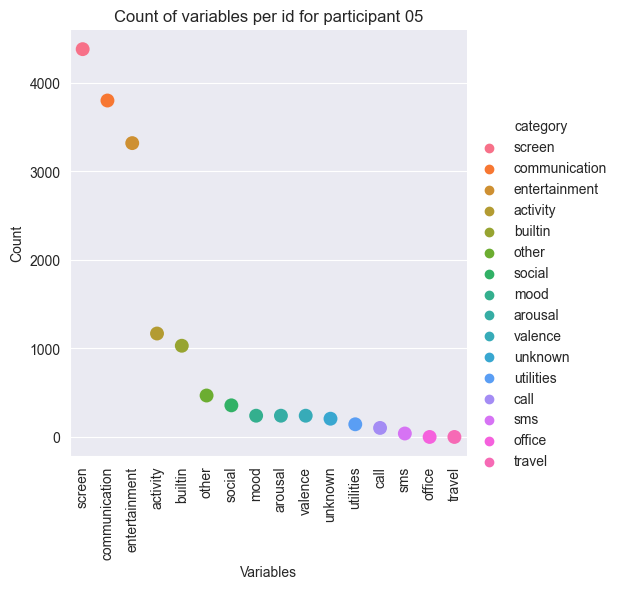

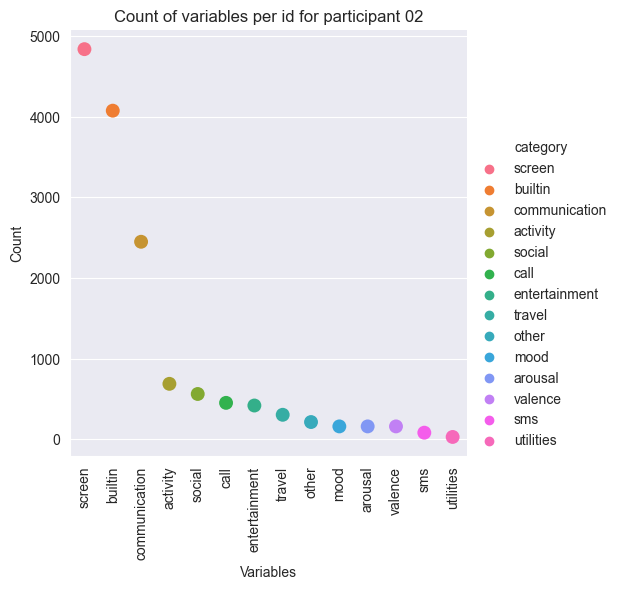

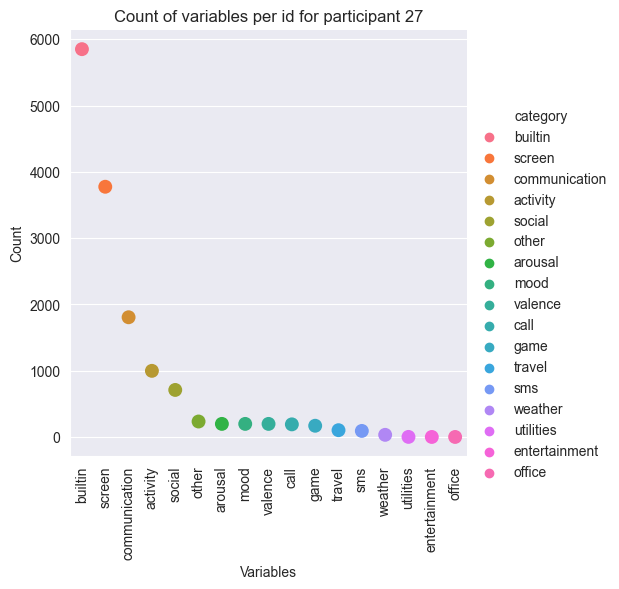

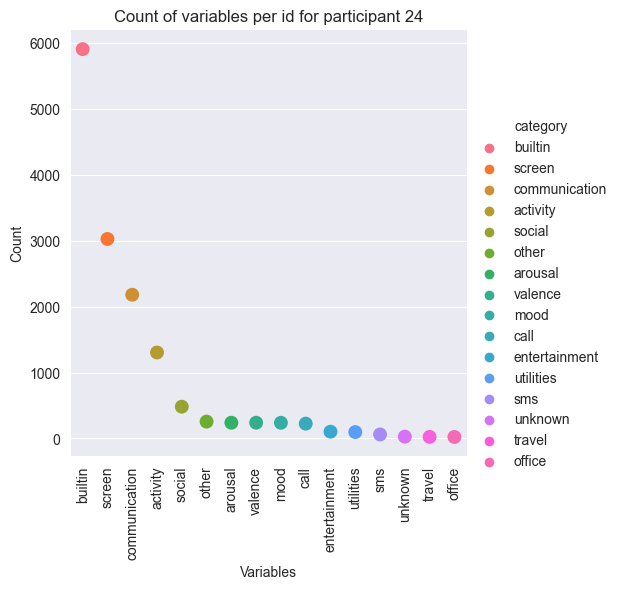

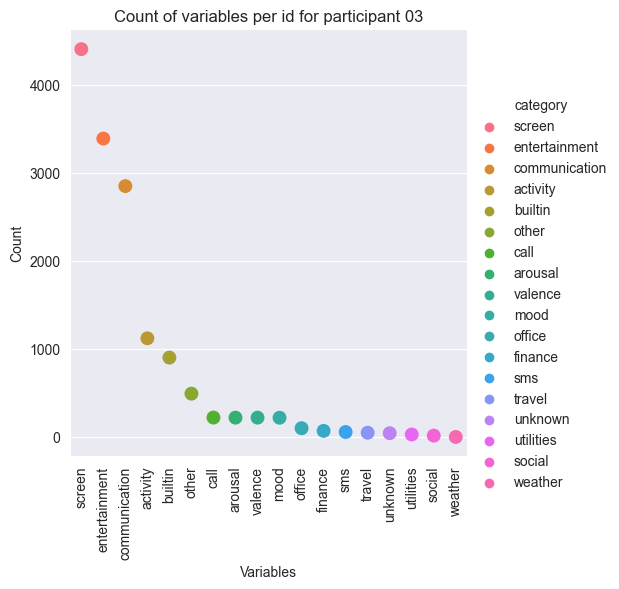

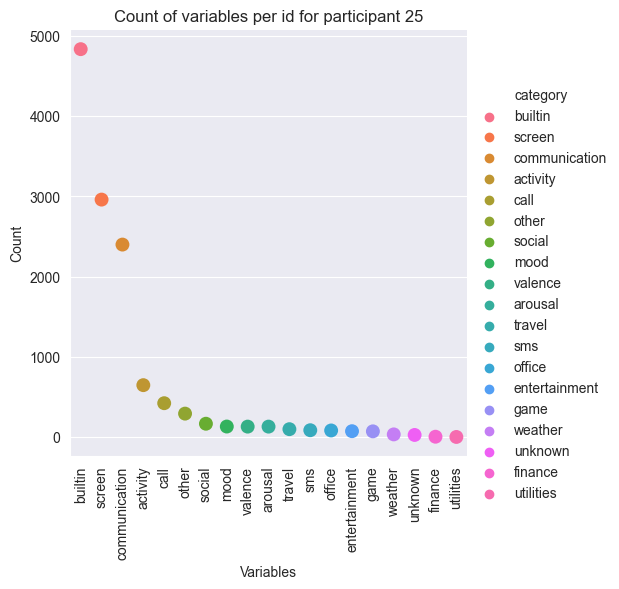

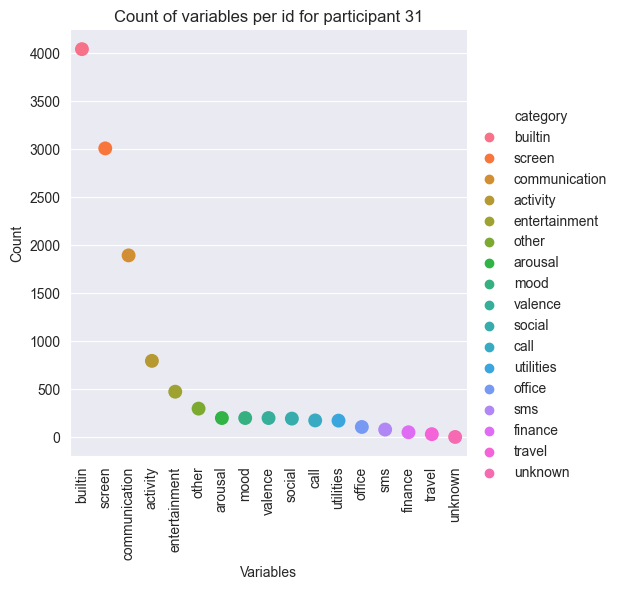

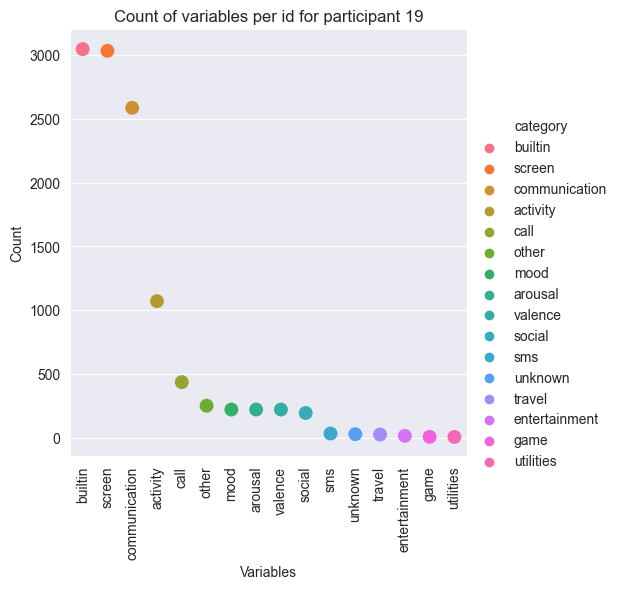

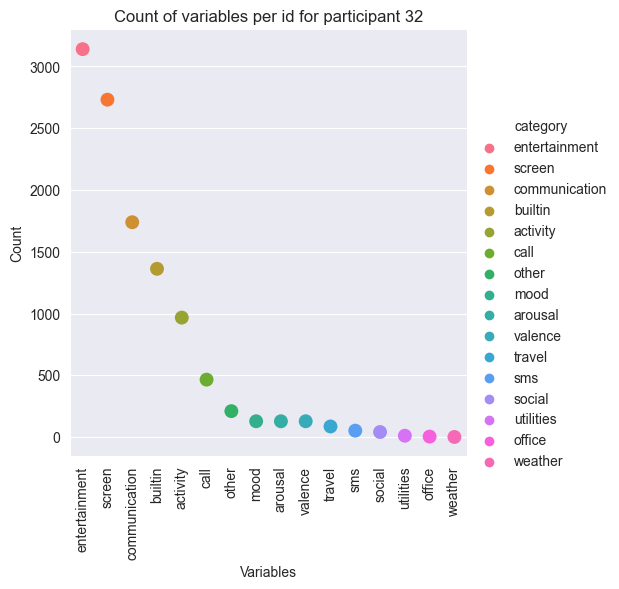

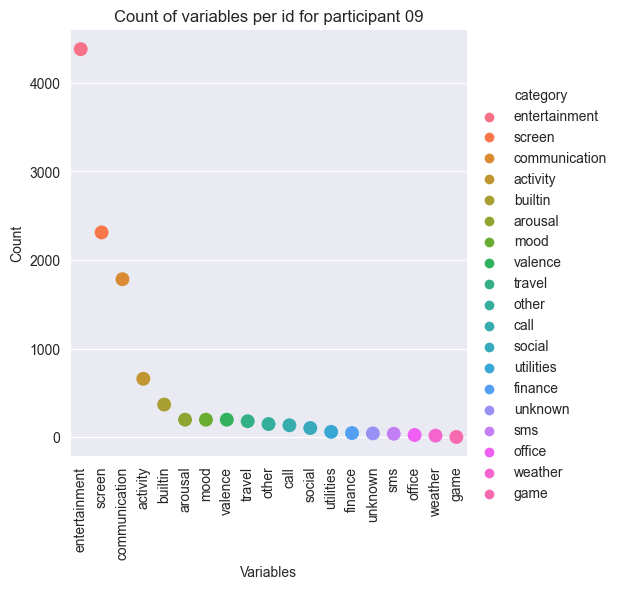

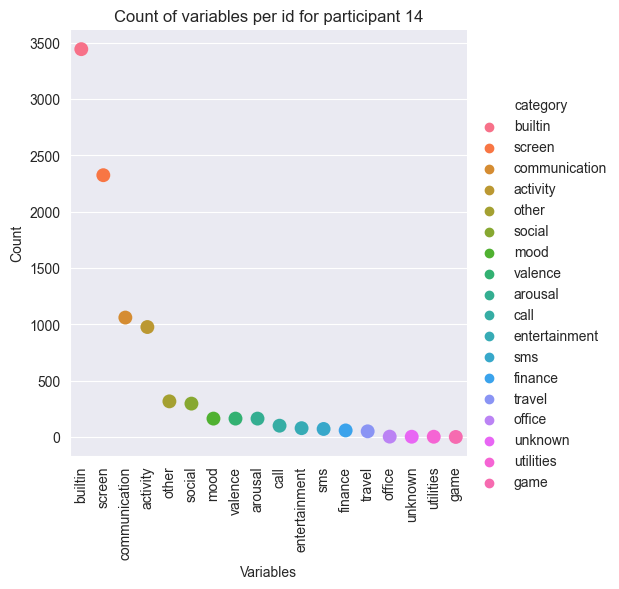

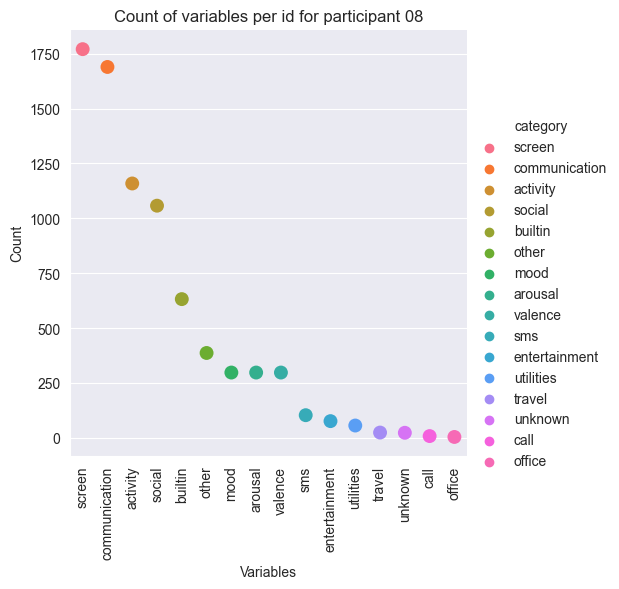

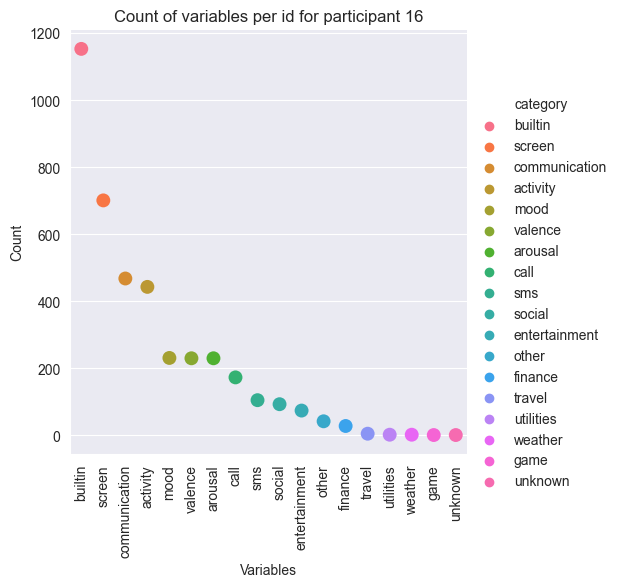

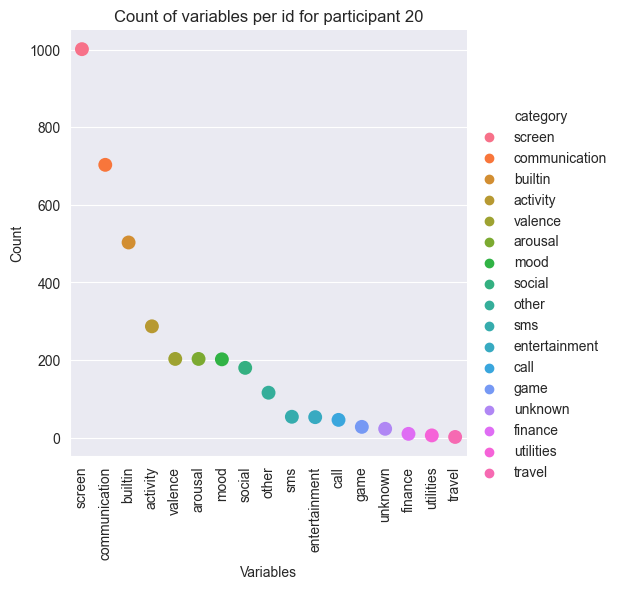

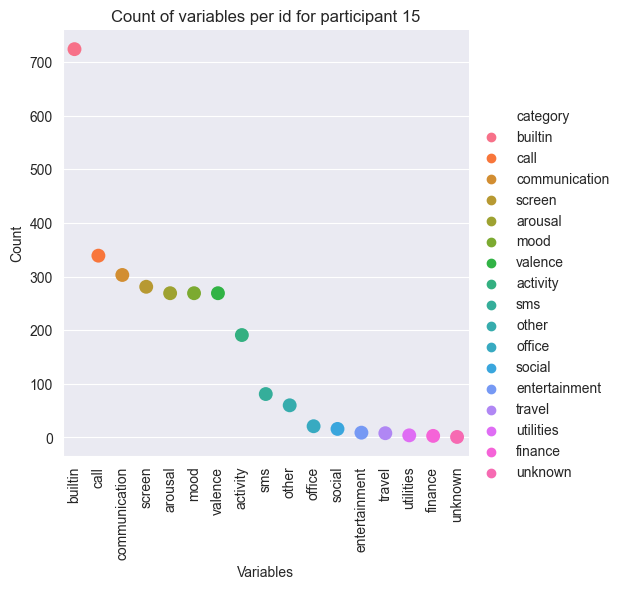

In [96]:
import warnings
warnings.filterwarnings('ignore')

x = df['id'].value_counts()
cols = [i for i in x.axes[0]]
count = 1
for i in cols:
    # plt.subplot(14,2,count)
    # count += 1

    grouped = df.groupby('id')
    col = grouped.get_group(i)

    x = col['variable'].value_counts()
    x = [i for i in x.axes[0]]
    y = list(col['variable'].value_counts())
    z=x
    data_list = pd.DataFrame(
        {'x_axis': x,
        'y_axis': y,
        'category': z
        })

    minsize = min(data_list['y_axis'])
    maxsize = max(data_list['y_axis'])

    sns.catplot(x="x_axis", y="y_axis", kind="swarm", hue="category",sizes=(100,100), data=data_list)
    sns.set_style('darkgrid')
    plt.xticks(rotation=90)
    plt.xlabel('Variables')
    plt.ylabel('Count')
    plt.title(f'Count of variables per id for participant {i}')
# plt.show()

In [ ]:
df.dtypes



Unnamed: 0             int64
id                    object
time          datetime64[ns]
variable              object
value                float64
dtype: object

In [ ]:
df['variable'].unique()


array(['mood', 'arousal', 'valence', 'activity', 'screen', 'call', 'sms',
       'builtin', 'communication', 'entertainment', 'finance', 'game',
       'office', 'other', 'social', 'travel', 'unknown', 'utilities',
       'weather'], dtype=object)

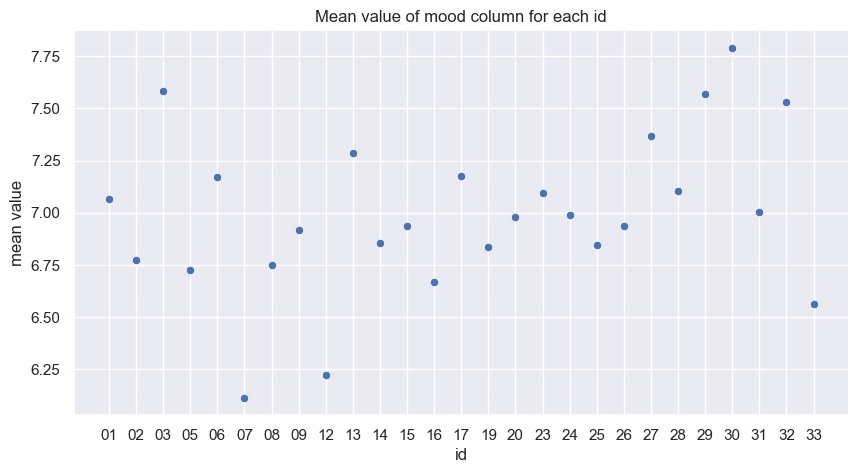

<Figure size 20000x500 with 0 Axes>

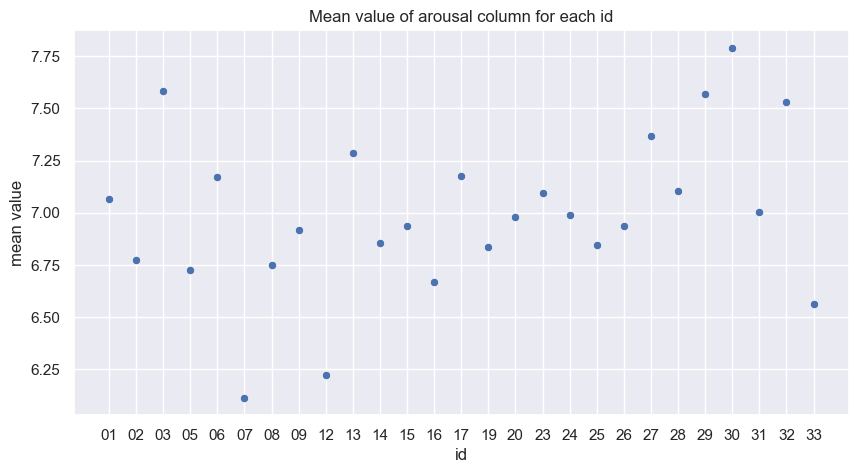

<Figure size 20000x500 with 0 Axes>

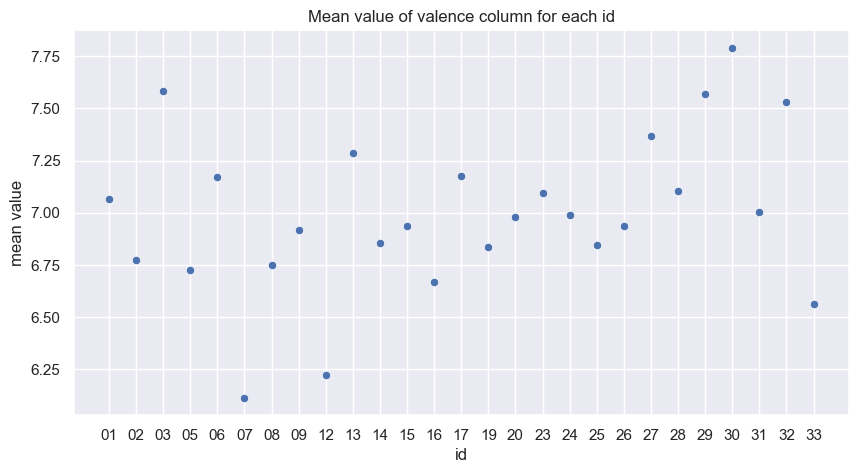

<Figure size 20000x500 with 0 Axes>

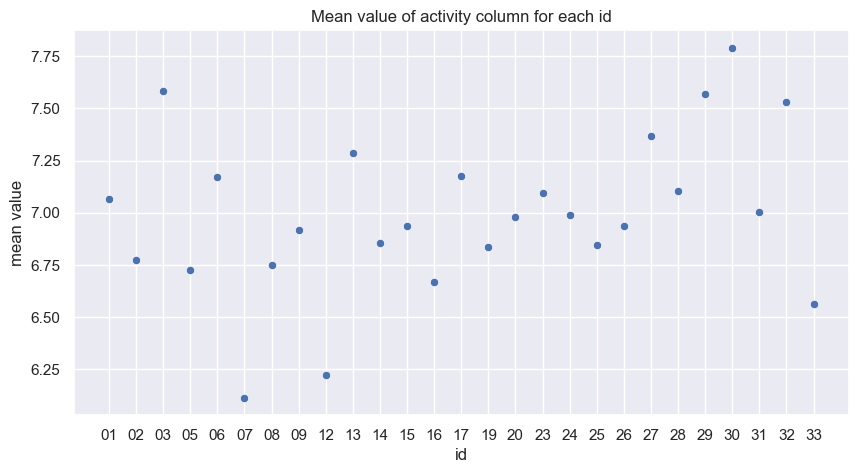

<Figure size 20000x500 with 0 Axes>

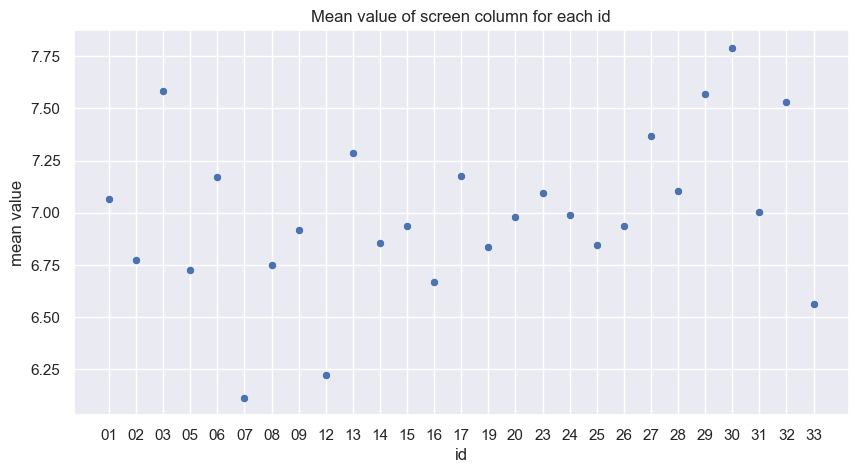

<Figure size 20000x500 with 0 Axes>

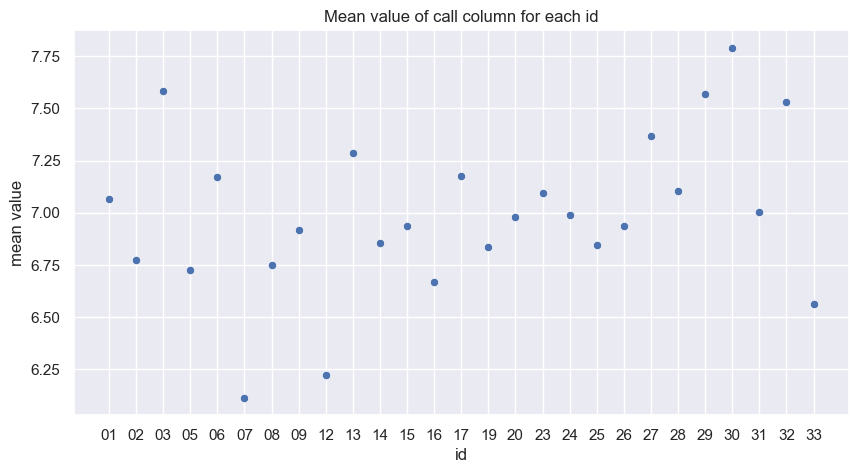

<Figure size 20000x500 with 0 Axes>

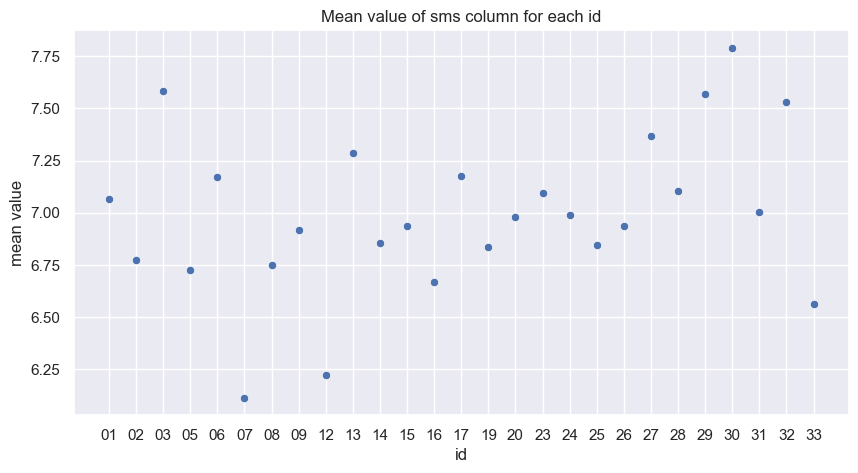

<Figure size 20000x500 with 0 Axes>

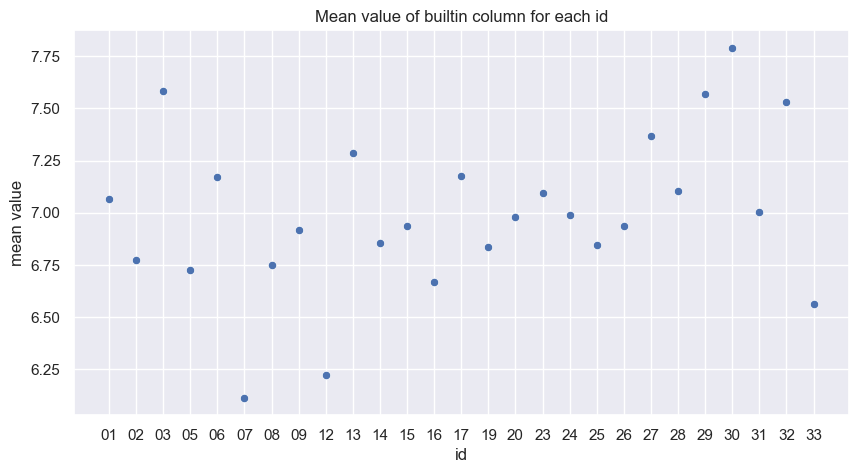

<Figure size 20000x500 with 0 Axes>

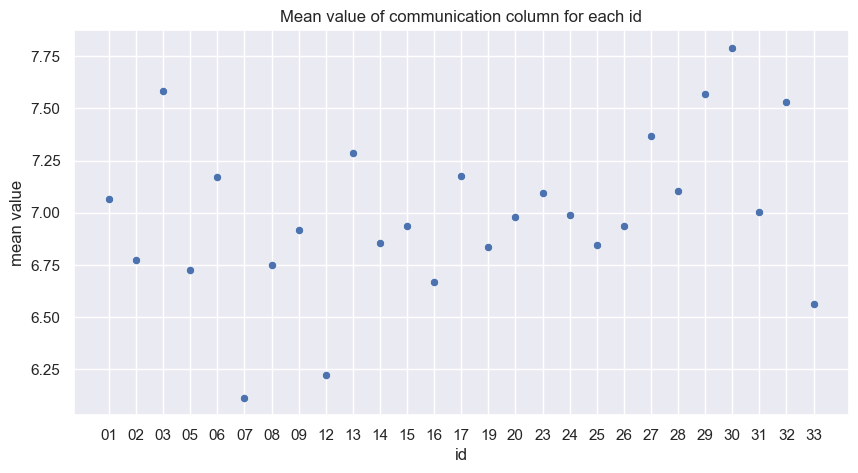

<Figure size 20000x500 with 0 Axes>

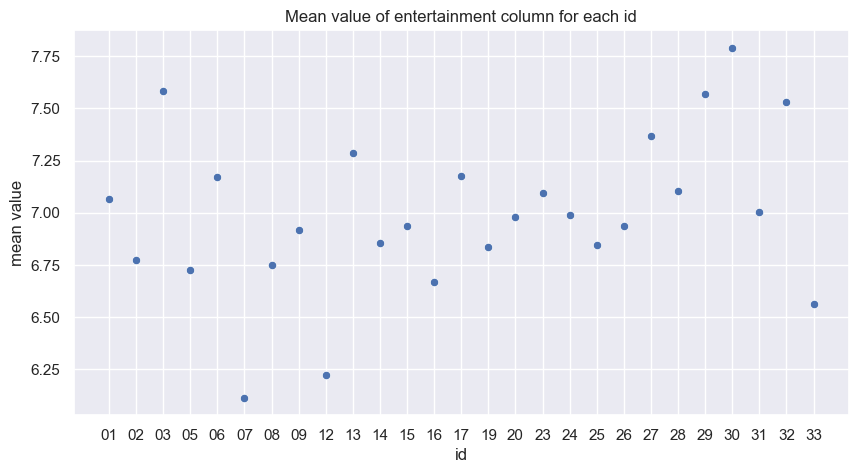

<Figure size 20000x500 with 0 Axes>

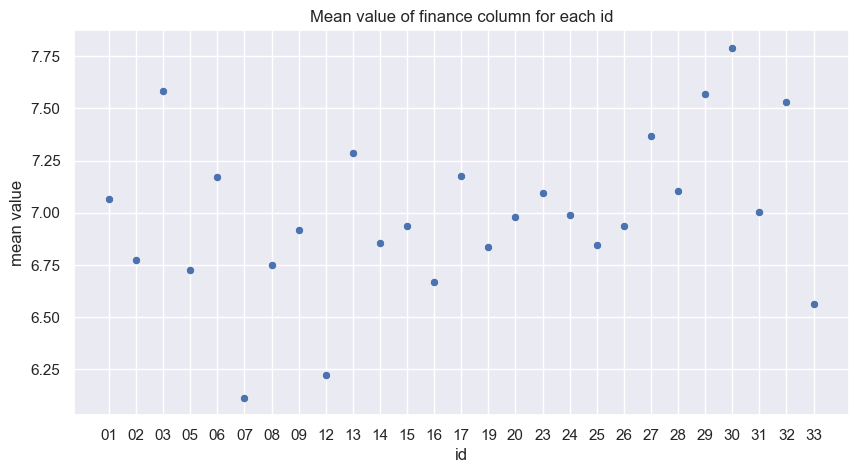

<Figure size 20000x500 with 0 Axes>

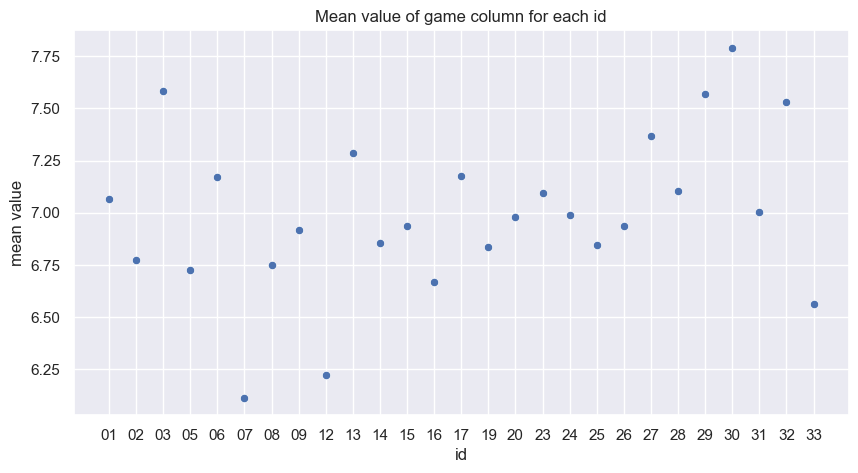

<Figure size 20000x500 with 0 Axes>

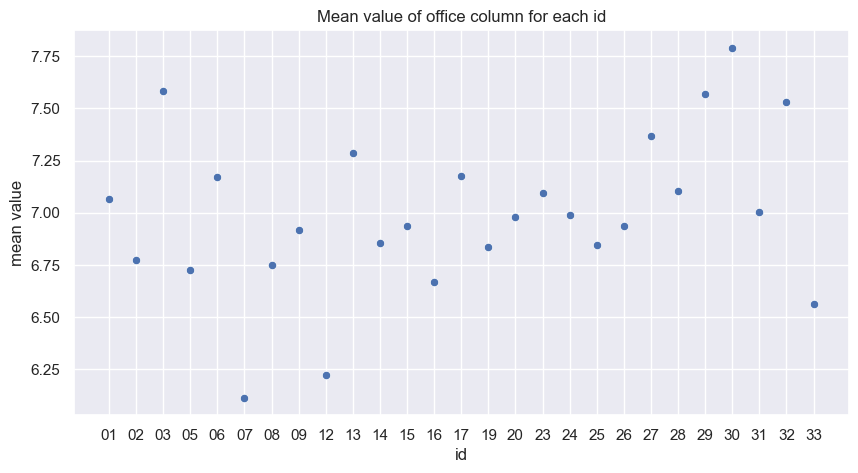

<Figure size 20000x500 with 0 Axes>

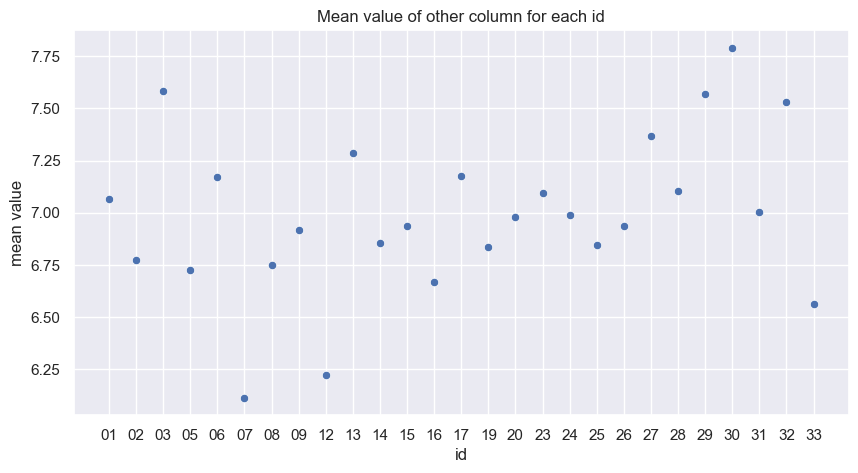

<Figure size 20000x500 with 0 Axes>

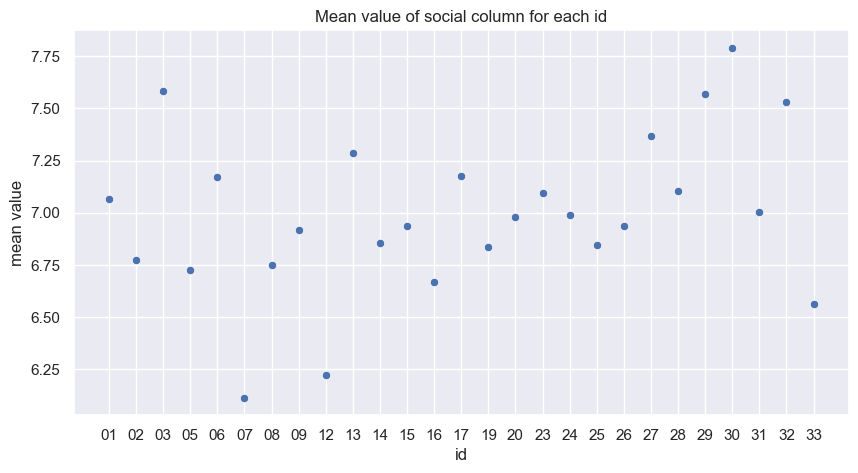

<Figure size 20000x500 with 0 Axes>

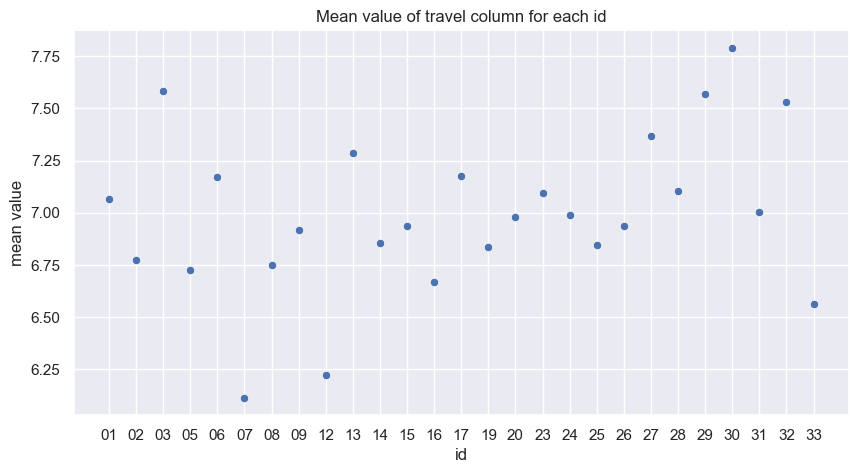

<Figure size 20000x500 with 0 Axes>

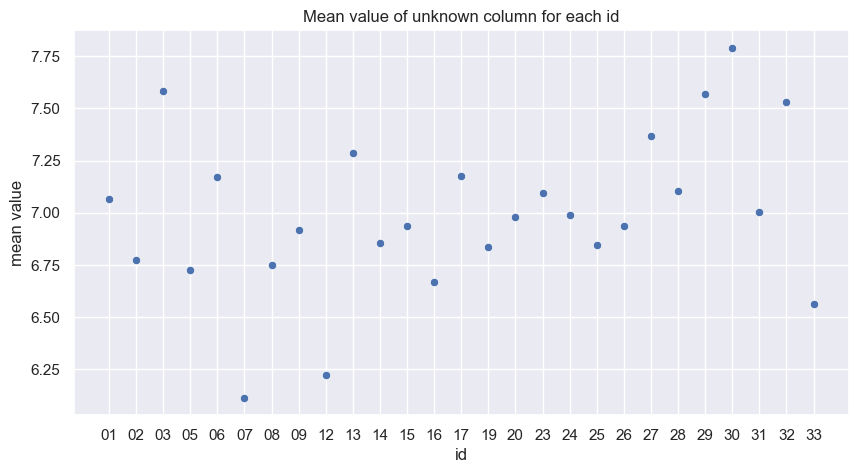

<Figure size 20000x500 with 0 Axes>

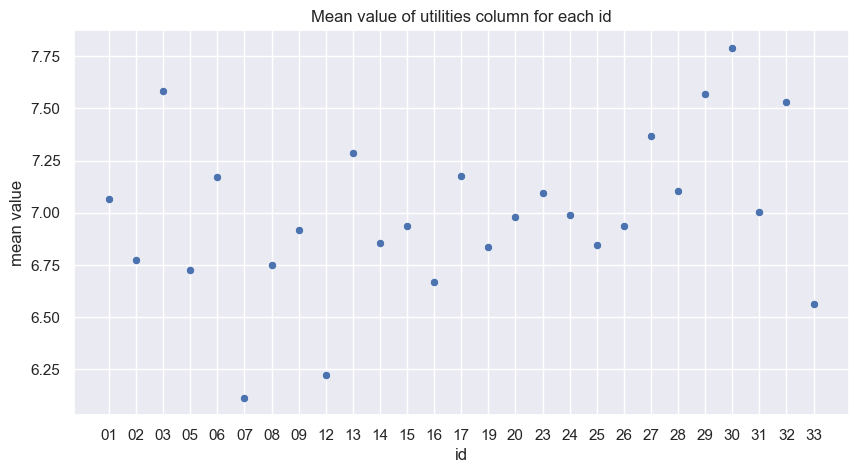

<Figure size 20000x500 with 0 Axes>

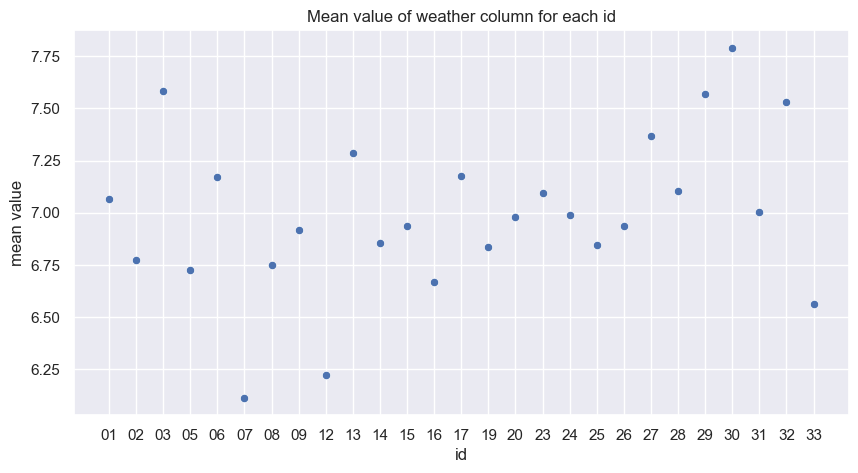

<Figure size 20000x500 with 0 Axes>

In [ ]:
for variable in df['variable'].unique():
    temp_df = df[df['variable'] == 'mood']
    group = temp_df.groupby('id')['value'].mean().reset_index()
    # plot the grouped data
    sns.set(rc={'figure.figsize':(10,5)})
    sns.scatterplot(x=group['id'], y = group['value'])
    plt.xlabel('id')
    plt.ylabel('mean value')
    plt.title(f'Mean value of {variable} column for each id')
    plt.figure(figsize=(200, 5))
    plt.show()

ValueError: plot kind scatter can only be used for data frames